# Load Libraries

In [1125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [945]:
file_path = r"C:\Users\aravit01\Downloads\1722506184_hr_comma_sep\HR_comma_sep.csv"
df = pd.read_csv(file_path)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [946]:
df.shape

(14999, 10)

In [947]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [948]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [949]:
df.duplicated().sum()

3008

In [950]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [951]:
df[df.duplicated(keep=False)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [952]:
df = df.drop_duplicates(keep='first')

In [953]:
df.shape

(11991, 10)

In [954]:
df['last_evaluation'].describe()

count    11991.000000
mean         0.716683
std          0.168343
min          0.360000
25%          0.570000
50%          0.720000
75%          0.860000
max          1.000000
Name: last_evaluation, dtype: float64

observations
- no null values found
- found duplicateds, duplicate rows are dropped keeping first row as is
- cat features : 2
- num features : 8

# EDA (Explorartory Data Analysis)

C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


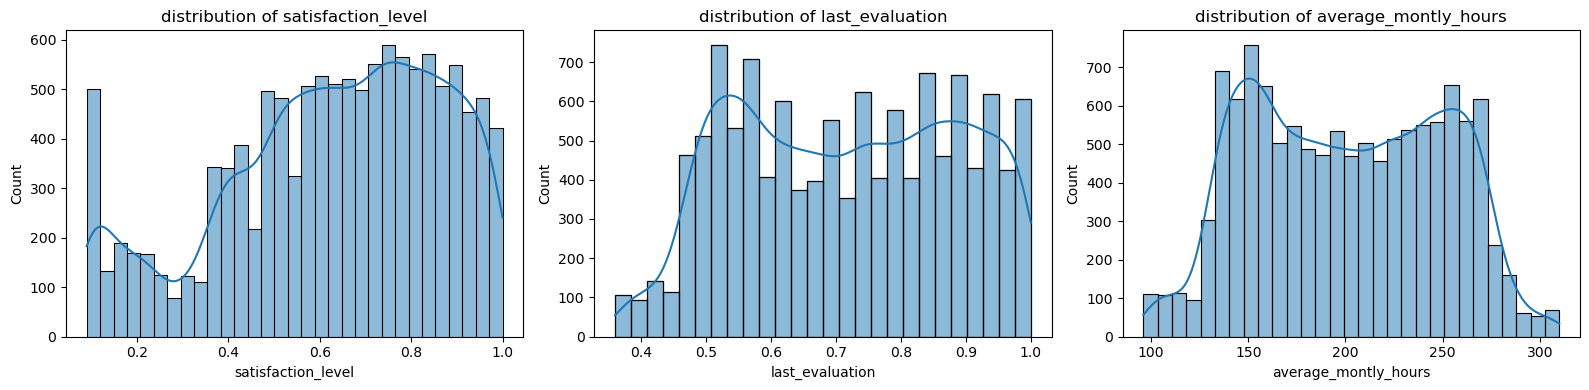

In [955]:
plt.subplots(1,3, figsize=(16,4))

plt.subplot(1,3,1)
sns.histplot(data = df, x = 'satisfaction_level', kde = True)
plt.title('distribution of satisfaction_level')

plt.subplot(1,3,2)
sns.histplot(data = df, x = 'last_evaluation', kde = True)
plt.title('distribution of last_evaluation')

plt.subplot(1,3,3)
sns.histplot(data = df, x = 'average_montly_hours', kde = True)
plt.title('distribution of average_montly_hours')


plt.tight_layout()
plt.show()

observation:
- mostly satisfaction_level, last_evaluation, average_montly_hours are normally distributed

C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


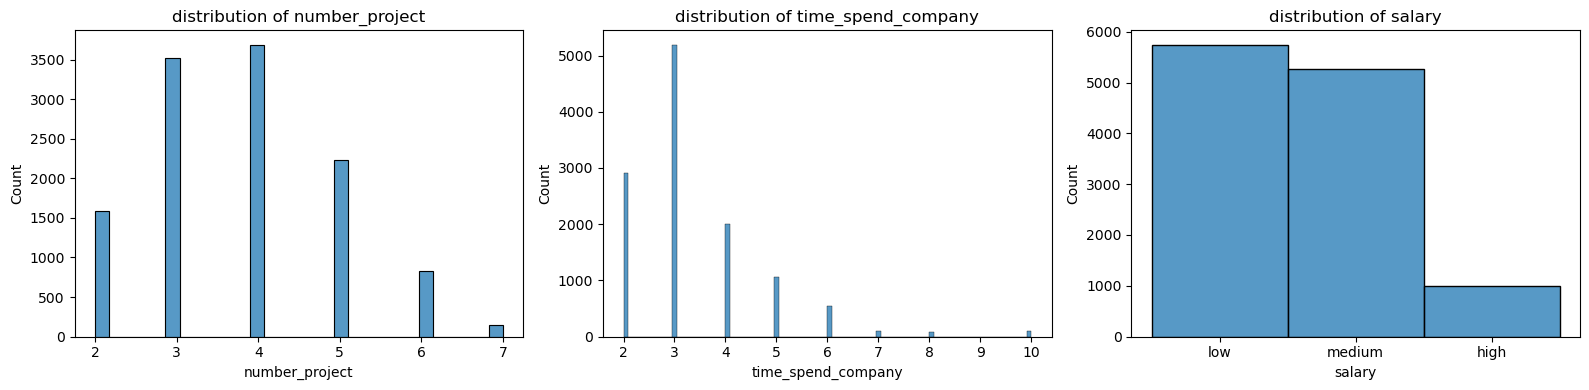

In [956]:
plt.subplots(1,3, figsize=(16,4))

plt.subplot(1,3,1)
sns.histplot(data = df, x = 'number_project')
plt.title('distribution of number_project')

plt.subplot(1,3,2)
sns.histplot(data = df, x = 'time_spend_company')
plt.title('distribution of time_spend_company')

plt.subplot(1,3,3)
sns.histplot(data = df, x = 'salary')
plt.title('distribution of salary')


plt.tight_layout()
plt.show()

observations:
- most of emp's work's atleast in 3,4,5 projects
- intrestingly there are few emp who work in 7 projects as well.
- most of emp time atleast 2,3,4 years
- most of emp are low salary group
- salary group: low > medium > high

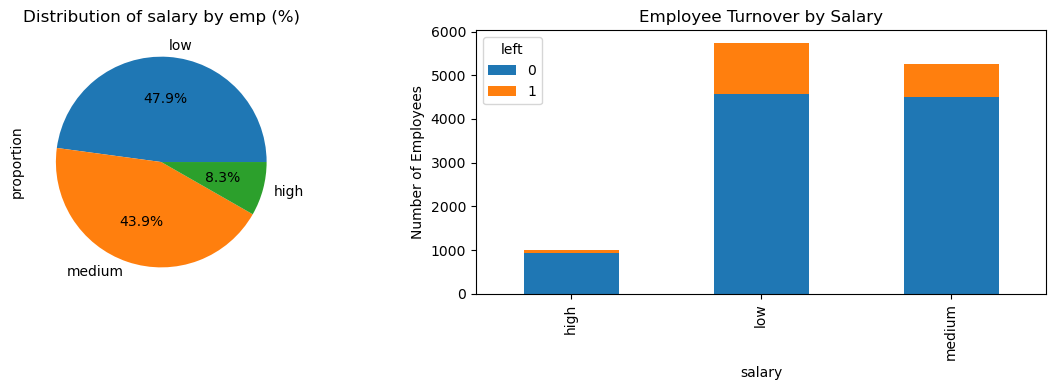

In [957]:
fig, axes = plt.subplots(1,2,figsize= (12,4))
axes = axes.flatten()

(df['salary'].value_counts(normalize=True) * 100).plot(kind= 'pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title("Distribution of salary by emp (%)")

df.groupby(['salary', 'left'])['left'].count().unstack().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Employee Turnover by Salary')
axes[1].set_ylabel('Number of Employees')


plt.tight_layout()
plt.show()

observations:
- 48% of emp's are in low salary group
- emp left company are mostly low salary group, above 2 visual illustrates the same

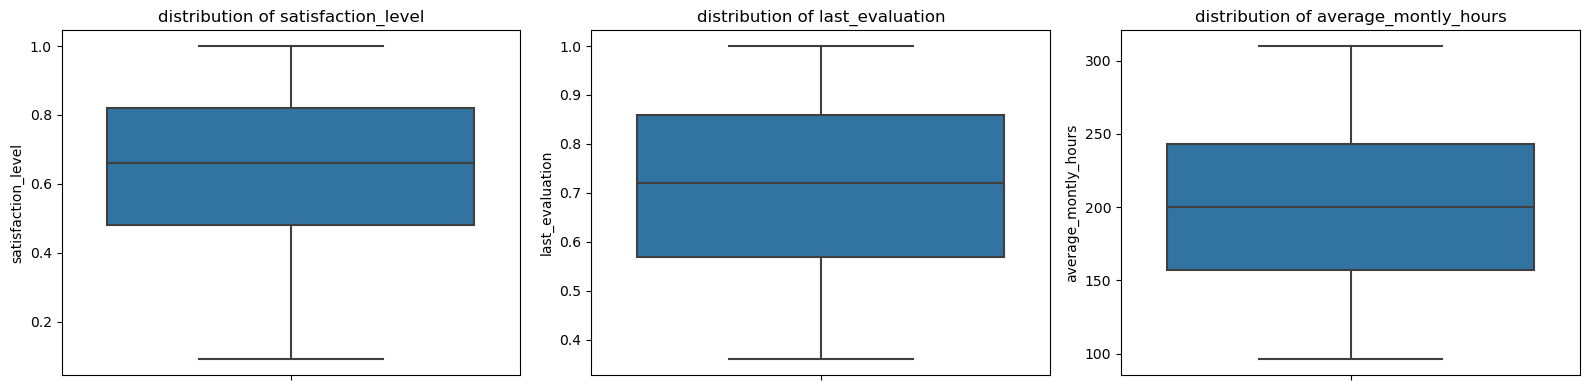

In [958]:
plt.subplots(1,3, figsize=(16,4))

plt.subplot(1,3,1)
sns.boxplot(data = df, y = 'satisfaction_level')
plt.title('distribution of satisfaction_level')

plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'last_evaluation')
plt.title('distribution of last_evaluation')

plt.subplot(1,3,3)
sns.boxplot(data = df, y = 'average_montly_hours')
plt.title('distribution of average_montly_hours')


plt.tight_layout()
plt.show()

observations:
- clear observation their is drop in last_evaluation Vs satisfaction_level
- avg_monthly hours around 200

Text(0.5, 1.0, 'satisfaction_level Vs Salary')

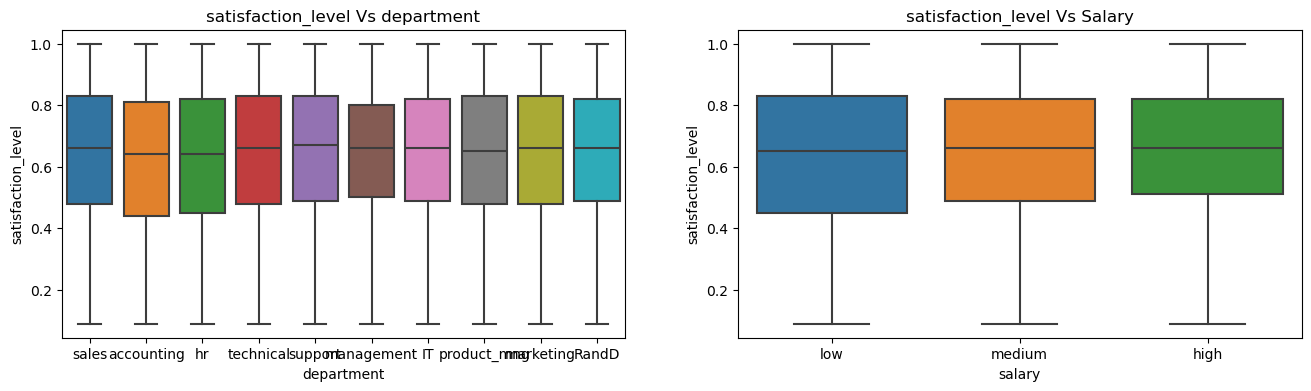

In [960]:
plt.subplots(1,2, figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data = df, y = 'satisfaction_level', x= 'department')
plt.title('satisfaction_level Vs department')

plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'satisfaction_level', x= 'salary')
plt.title('satisfaction_level Vs Salary')

observations:
- accounting, hr have low satisifcation_level compared with other departments
- low salary grpup have low satisifcation_level

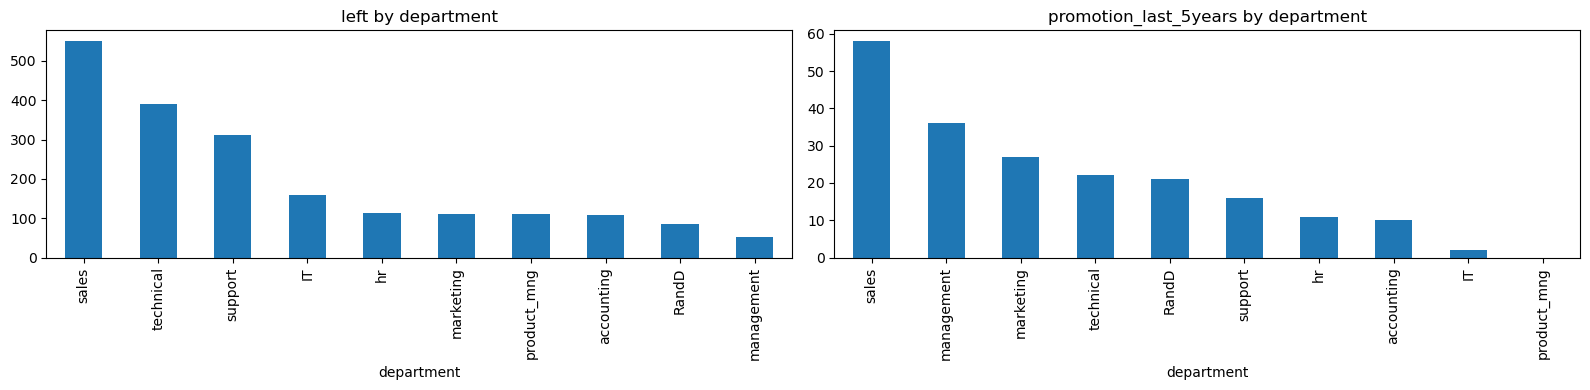

In [961]:
fig, axes = plt.subplots(1,2, figsize=(16,4))

axes = axes.flatten()

df.groupby(by = 'department')['left'].sum().sort_values(ascending=False).plot(kind = 'bar', ax=axes[0])
axes[0].set_title('left by department')

df.groupby(by = 'department')['promotion_last_5years'].sum().sort_values(ascending=False).plot(kind = 'bar', ax=axes[1])
axes[1].set_title('promotion_last_5years by department')


plt.tight_layout()
plt.show()

observations:
- emp in department (sales, technical, support) are one leave's company 
- other department emp mostly stay's
- sales, management,marketing emp get promoted compared to other departments

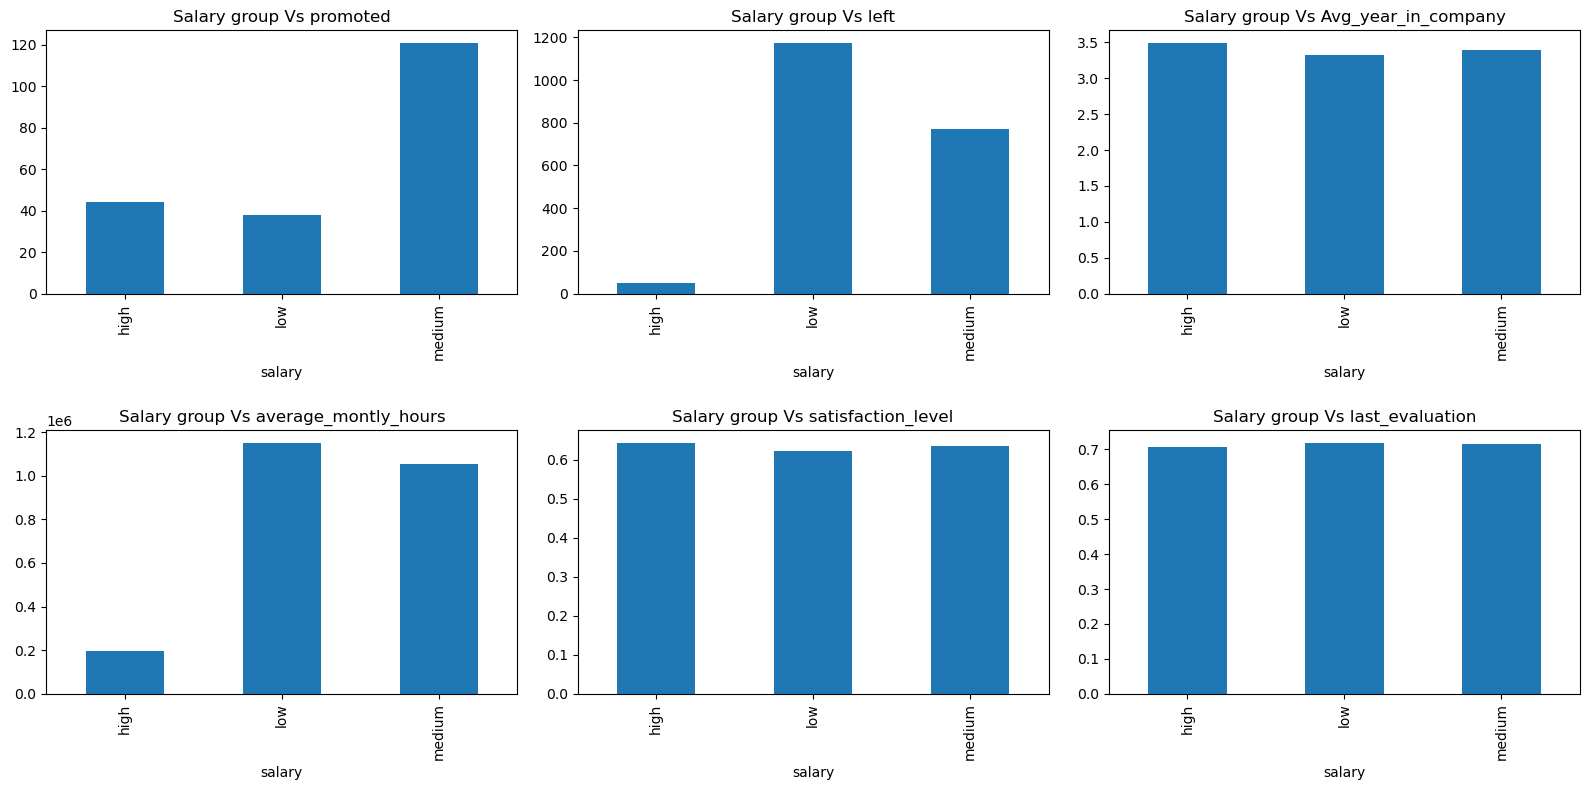

In [962]:
fig, axes = plt.subplots(2,3, figsize=(16,8))

axes = axes.flatten()

df.groupby(by = 'salary')['promotion_last_5years'].sum().plot(kind = 'bar', ax=axes[0])
axes[0].set_title('Salary group Vs promoted')

df.groupby(by = 'salary')['left'].sum().plot(kind = 'bar', ax=axes[1])
axes[1].set_title('Salary group Vs left')

df.groupby(by = 'salary')['time_spend_company'].mean().plot(kind = 'bar', ax=axes[2])
axes[2].set_title('Salary group Vs Avg_year_in_company')

df.groupby(by = 'salary')['average_montly_hours'].sum().plot(kind = 'bar', ax=axes[3])
axes[3].set_title('Salary group Vs average_montly_hours')

df.groupby(by = 'salary')['satisfaction_level'].mean().plot(kind = 'bar', ax=axes[4])
axes[4].set_title('Salary group Vs satisfaction_level')

df.groupby(by = 'salary')['last_evaluation'].mean().plot(kind = 'bar', ax=axes[5])
axes[5].set_title('Salary group Vs last_evaluation')

plt.tight_layout()
plt.show()

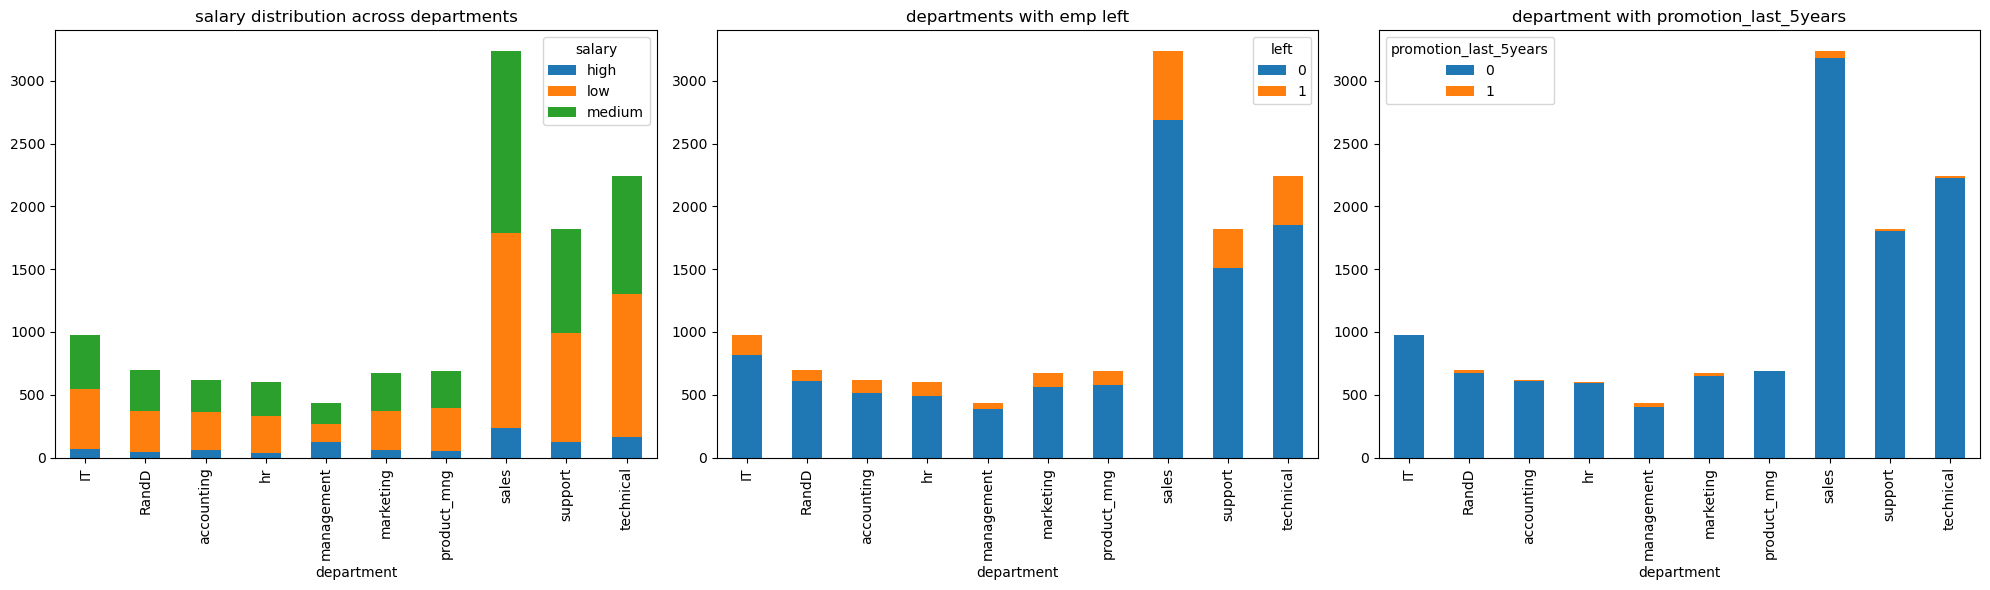

In [963]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
axes = axes.flatten()

crosstab = pd.crosstab(df['department'], df['salary'])
crosstab.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('salary distribution across departments')

crosstab = pd.crosstab(df['department'], df['left'])
crosstab.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('departments with emp left')

crosstab = pd.crosstab(df['department'], df['promotion_last_5years'])
crosstab.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('department with promotion_last_5years')

plt.tight_layout()
plt.show()

observations:
- sales department have highest no.of low salary group emp's & highest no.of high salary group emp's
- order of department(sales> technical>support) with emp leaving comapny  
- sales > management emp's have promotions
- salesm support, technical department have low salary emp so emp "left" will be high compared to other departments

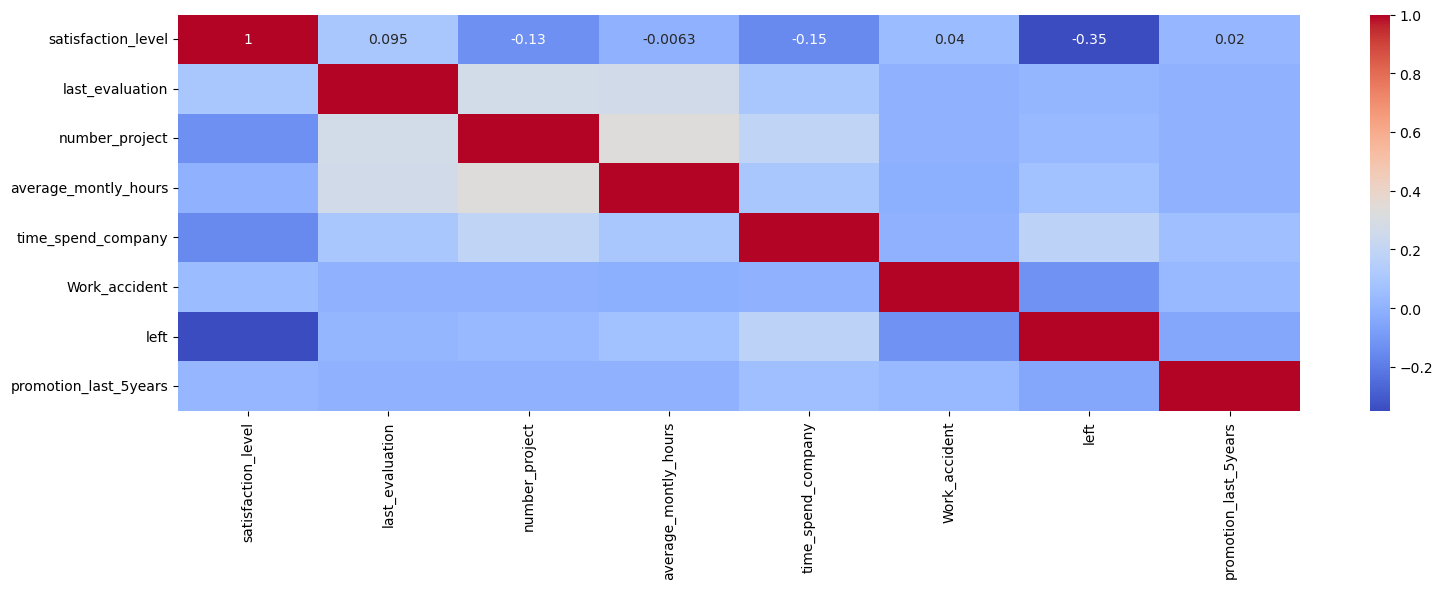

In [964]:
plt.figure(figsize=(16,6))
correlation = df.select_dtypes(exclude='object').corr()
sns.heatmap(data = correlation, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

observations:
- last_evaluation Vs satisfication_level are highly correlated
- number_projects Vs satisfication_level negatively correlated, bcuz if no.of projects increases satisifcation level drops
- avg_monthly_hrs Vs satisfication_level negatively correlated, bcuz if avg_monthly_hrs increases satisifcation level drops
- time_spend_company Vs satisfication_level negatively correlated, bcuz if time_spend_company increases satisifcation level drops
- left Vs satisfication_level strongly negatively correlated, prime reason by leaving the company is bcuz of satisfication_level 

# Preprocessing before Clustering

### like data scaling for numerical features
### OHE/Target encoding for categorical features

In [965]:
df1 = df.copy(deep=True)

In [966]:
df1.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [967]:
salary_mapping = {'low':1, 'medium':2, 'high': 3}

In [968]:
df1['salary'] = df1['salary'].map(salary_mapping)

## One hot encoding for nominal variables

In [969]:
cols_to_ohe = ['department']
df2 = pd.get_dummies(data = df1, columns= cols_to_ohe, drop_first=True, dtype='int8')
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,3,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,3,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,3,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,3,0,0,0,0,1,0,0,0,0


## data scaling

In [970]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

In [971]:
cols_to_scale = ['number_project','average_montly_hours', 'time_spend_company']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [973]:
df2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,0.360570,0.488194,0.170607,0.154282,0.166041,0.016929,1.60387,0.057877,0.051789,0.050121,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714
std,0.241070,0.168343,0.232648,0.227700,0.166280,0.361234,0.372133,0.129012,0.63590,0.233520,0.221610,0.218204,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004
min,0.090000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,0.200000,0.285047,0.125000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,0.400000,0.485981,0.125000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.820000,0.860000,0.600000,0.686916,0.250000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


observations:
- minmaxscaler: so min = 0 & max=1
- categorical features to ohe

## Clustering

In [974]:
kmeans = KMeans(n_clusters= 3, random_state=42)
df2['cluster'] = kmeans.fit_predict(df2[['satisfaction_level','last_evaluation']])

C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [975]:
df2['cluster'].unique()

array([1, 0, 2])

In [976]:
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,cluster
0,0.38,0.53,0.0,0.285047,0.125,0,1,0,1,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,0.6,0.775701,0.500,0,1,0,2,0,0,0,0,0,0,1,0,0,0
2,0.11,0.88,1.0,0.822430,0.250,0,1,0,2,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,0.6,0.593458,0.375,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,0.37,0.52,0.0,0.294393,0.125,0,1,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,0.2,0.761682,1.000,1,0,1,3,0,0,0,1,0,0,0,0,0,2
11996,0.74,0.95,0.6,0.794393,1.000,0,0,1,3,0,0,0,1,0,0,0,0,0,0
11997,0.85,0.54,0.2,0.415888,1.000,0,0,1,3,0,0,0,1,0,0,0,0,0,2
11998,0.33,0.65,0.2,0.355140,1.000,0,0,1,3,0,0,0,0,1,0,0,0,0,1


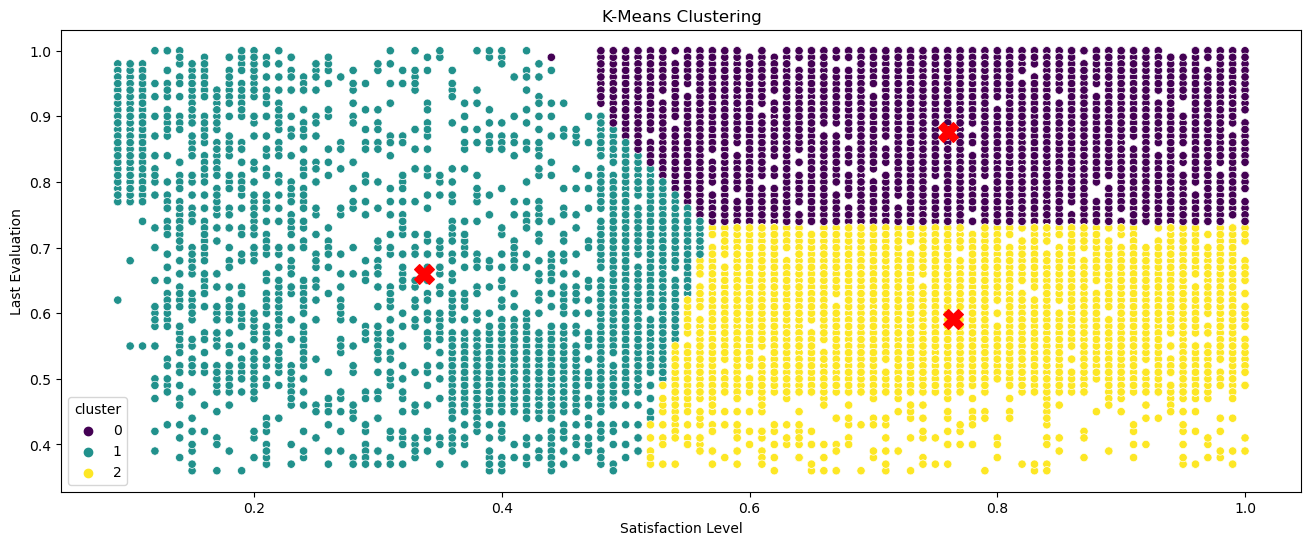

In [977]:
plt.figure(figsize=(16,6))
sns.scatterplot(data  =df2, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='cluster')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')

plt.show()

In [978]:
centroids

array([[0.75989952, 0.87564056],
       [0.33683816, 0.66006967],
       [0.76431701, 0.59173454]])

In [979]:
df2.shape

(11991, 19)

In [981]:
df2[df2['cluster']==0].shape,df2[df2['cluster']==1].shape, df2[df2['cluster']==2].shape

((4379, 19), (3739, 19), (3873, 19))

In [982]:
cluster0 = df2[df2['cluster']==0][['satisfaction_level','last_evaluation']].describe().loc['mean']
cluster1 = df2[df2['cluster']==1][['satisfaction_level','last_evaluation']].describe().loc['mean']
cluster2 = df2[df2['cluster']==2][['satisfaction_level','last_evaluation']].describe().loc['mean']

print("Mean satisfaction_level & last_evaluation")
print("-----------------------------------------")
print(f"cluster 0: \n  {cluster0} \n")
print(f"cluster 1: \n  {cluster1} \n")
print(f"cluster 2: \n  {cluster2} \n")
      


Mean satisfaction_level & last_evaluation
-----------------------------------------
cluster 0: 
  satisfaction_level    0.759900
last_evaluation       0.875641
Name: mean, dtype: float64 

cluster 1: 
  satisfaction_level    0.337202
last_evaluation       0.659786
Name: mean, dtype: float64 

cluster 2: 
  satisfaction_level    0.764738
last_evaluation       0.591885
Name: mean, dtype: float64 



In [983]:
cluster0 = df2[df2['cluster']==0][['satisfaction_level','last_evaluation']].describe().loc['50%']
cluster1 = df2[df2['cluster']==1][['satisfaction_level','last_evaluation']].describe().loc['50%']
cluster2 = df2[df2['cluster']==2][['satisfaction_level','last_evaluation']].describe().loc['50%']


print("Median satisfaction_level & last_evaluation")
print("-----------------------------------------")
print(f"cluster 0: \n  {cluster0} \n")
print(f"cluster 1: \n  {cluster1} \n")
print(f"cluster 2: \n  {cluster2} \n")

Median satisfaction_level & last_evaluation
-----------------------------------------
cluster 0: 
  satisfaction_level    0.77
last_evaluation       0.88
Name: 50%, dtype: float64 

cluster 1: 
  satisfaction_level    0.38
last_evaluation       0.63
Name: 50%, dtype: float64 

cluster 2: 
  satisfaction_level    0.76
last_evaluation       0.59
Name: 50%, dtype: float64 



observation:
- after clustering below are observations n emp group's
  
- cluster 0: satisfaction level dropped compared with last evaluation because of multiple reason's
  
- cluster 1: highly dissatisfacted group in complete dataset because of multiple reason's

- cluster 2: highly satisfacted group when comapred with last evaluation because of multiple reason's


# Cluser analysis
### merge operation

- df1 cluster feature ❌
- df2 cluster feature ✅

- merged df1.index with df2.index to pull cluster feature.
- so that we perform cluster analysis on 
- order of more vunerability: cluster1 cluster 0 > cluster 2 

In [1004]:
df1_temp = pd.merge(df1,df2['cluster'], how='inner', left_index=True, right_index=True, )
df1_temp

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,cluster
0,0.38,0.53,2,157,3,0,1,0,sales,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,2,0
2,0.11,0.88,7,272,4,0,1,0,sales,2,1
3,0.72,0.87,5,223,5,0,1,0,sales,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,3,2
11996,0.74,0.95,5,266,10,0,0,1,management,3,0
11997,0.85,0.54,3,185,10,0,0,1,management,3,2
11998,0.33,0.65,3,172,10,0,0,1,marketing,3,1


In [1013]:
df1_temp[df1_temp['cluster']==0].shape,df1_temp[df1_temp['cluster']==1].shape,df1_temp[df1_temp['cluster']==2].shape

((4379, 11), (3739, 11), (3873, 11))

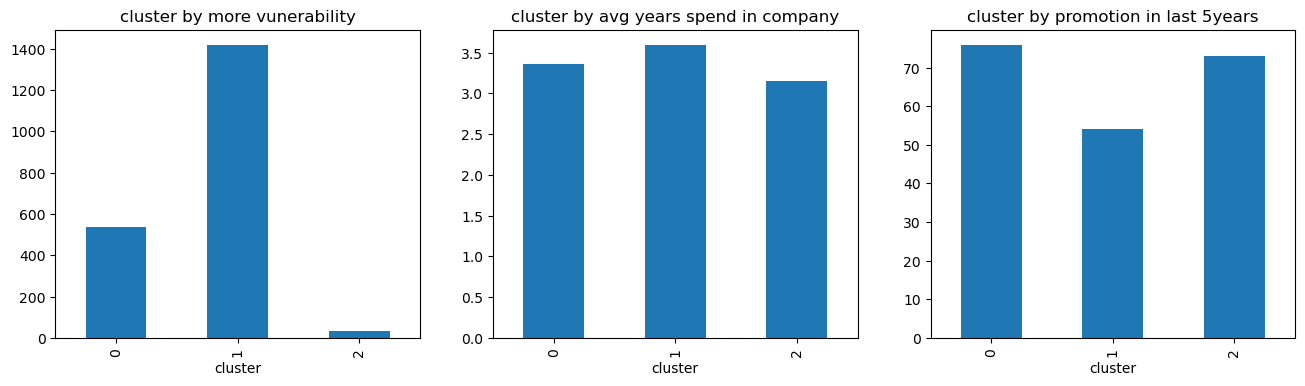

In [1087]:
plt.subplots(1,3,figsize=(16,4))

plt.subplot(1,3,1)
df1_temp.groupby(by='cluster')['left'].sum().plot(kind='bar')
plt.title('cluster by more vunerability')

plt.subplot(1,3,2)
df1_temp.groupby(by='cluster')['time_spend_company'].mean().plot(kind='bar')
plt.title('cluster by avg years spend in company')

plt.subplot(1,3,3)
df1_temp.groupby(by='cluster')['promotion_last_5years'].sum().plot(kind='bar')
plt.title('cluster by promotion in last 5years')


plt.show()

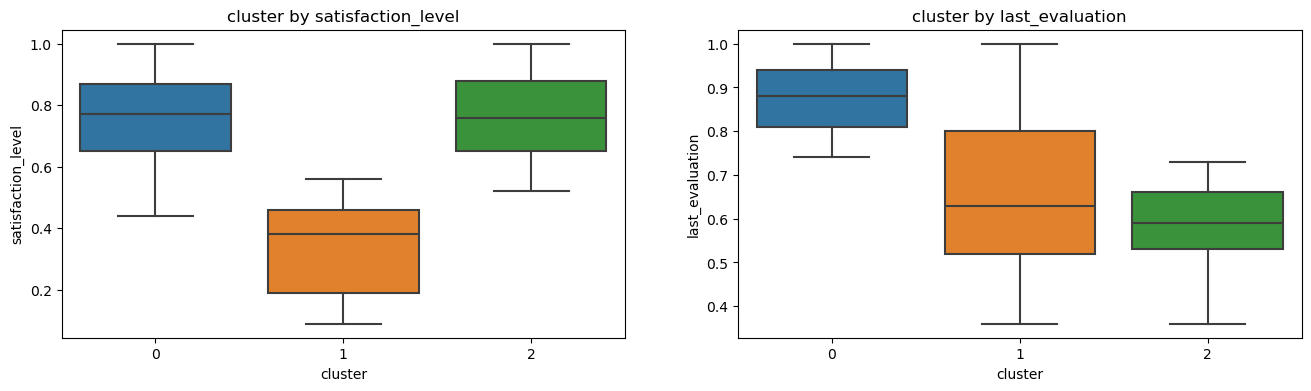

In [1045]:
plt.subplots(1,2,figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df1_temp, x='cluster',y='satisfaction_level')
plt.title('cluster by satisfaction_level')

plt.subplot(1,2,2)
sns.boxplot(data=df1_temp, x='cluster',y='last_evaluation')
plt.title('cluster by last_evaluation')

plt.show()

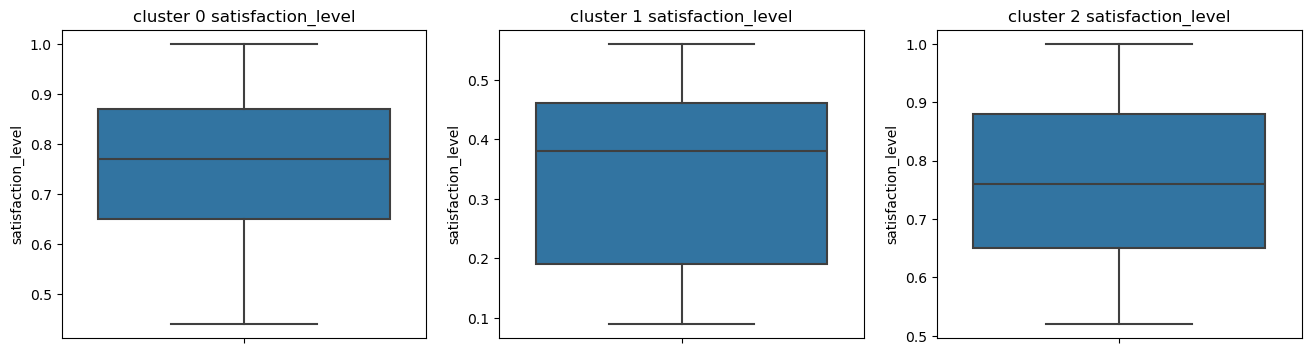

In [1047]:
plt.subplots(1,3,figsize=(16,4))

plt.subplot(1,3,1)
sns.boxplot(data = df2[df2['cluster']==0], y=df2[df2['cluster']== 0 ]['satisfaction_level'])
plt.title('cluster 0 satisfaction_level')

plt.subplot(1,3,2)
sns.boxplot(data = df2[df2['cluster']==1], y=df2[df2['cluster']==1]['satisfaction_level'])
plt.title('cluster 1 satisfaction_level')

plt.subplot(1,3,3)
sns.boxplot(data = df2[df2['cluster']==2], y=df2[df2['cluster']==2]['satisfaction_level'])
plt.title('cluster 2 satisfaction_level')

plt.show()

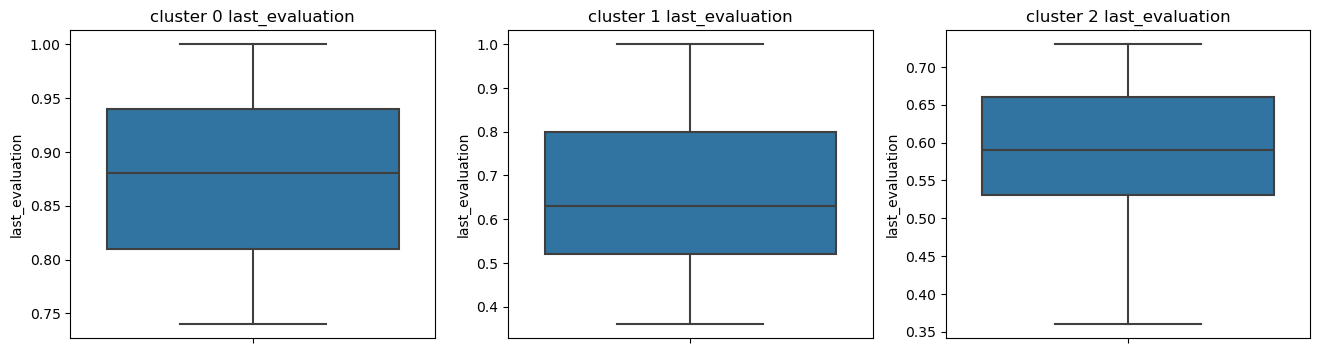

In [1048]:
plt.subplots(1,3,figsize=(16,4))

plt.subplot(1,3,1)
sns.boxplot(data = df2[df2['cluster']==0], y=df2[df2['cluster']== 0 ]['last_evaluation'])
plt.title('cluster 0 last_evaluation')

plt.subplot(1,3,2)
sns.boxplot(data = df2[df2['cluster']==1], y=df2[df2['cluster']==1]['last_evaluation'])
plt.title('cluster 1 last_evaluation')

plt.subplot(1,3,3)
sns.boxplot(data = df2[df2['cluster']==2], y=df2[df2['cluster']==2]['last_evaluation'])
plt.title('cluster 2 last_evaluation')

plt.show()

observations:
- cluster_1 is more vunerable 
- cluster_1 emp spend more years in company
- promtion in last 5 years: cluster_1 emp are more prone, which means cluster_1 emp got least promotions
- cluster_1 emp has low mean/median satisfaction_level
- cluster_1 emp has more randomness in last_evaluation

# Classification

In [1049]:
df3 = df2.copy(deep=True)

In [1050]:
df3.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,cluster
0,0.38,0.53,0.0,0.285047,0.125,0,1,0,1,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,0.6,0.775701,0.500,0,1,0,2,0,0,0,0,0,0,1,0,0,0


# Data Split

In [1051]:
X = df3.drop(columns='left', axis=1)
y = df3['left']

In [1052]:
X.shape, y.shape

((11991, 18), (11991,))

In [1053]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [1054]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9592, 18), (2399, 18), (9592,), (2399,))

# data scaling to implement VIF

notes:
- VIF is to find multicollinearity on independent features with target features
- VIF is applied on numerical features
- VIF helps in reducing features, VID > 10 indicated high multicollinearity

In [1055]:
# X_train.columns

In [608]:
# cols_to_scale1 = ['number_project','average_montly_hours', 'time_spend_company']

In [609]:
# scaler1 = MinMaxScaler()
# X_train[cols_to_scale1] = scaler1.fit_transform(X_train[cols_to_scale1])

In [611]:
# X_test[cols_to_scale1] = scaler1.transform(X_test[cols_to_scale1])

In [615]:
# salary_mapping1 = {'low': 1, 'medium': 2, 'high': 3}

In [617]:
# X_train['salary'] = X_train['salary'].map(salary_mapping1)

In [616]:
# X_test['salary'] = X_test['salary'].map(salary_mapping1)

In [618]:
# X_train.shape,X_test.shape

((9592, 9), (2399, 9))

In [1056]:
X_train.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,cluster
6426,0.86,0.56,0.6,0.210280,0.000,0,0,2,0,0,0,0,0,0,1,0,0,2
288,0.82,0.91,0.6,0.635514,0.375,0,0,1,0,0,0,0,0,0,0,0,1,0
5051,0.62,0.52,0.2,0.242991,0.125,0,0,2,0,0,0,0,0,0,1,0,0,2


## feature selection using VIF

In [1058]:
cols_to_vif = X_train.select_dtypes(exclude='object').columns
cols_to_vif

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'cluster'],
      dtype='object')

In [1059]:
df_vif = pd.DataFrame()
df_vif['features'] = cols_to_vif
df_vif['values'] = [variance_inflation_factor(X_train.select_dtypes(exclude='object').values, i ) for i in range(X_train.select_dtypes(exclude='object').shape[1])]

df_vif


,features,values
0,satisfaction_level,7.994064
1,last_evaluation,20.980922
2,number_project,4.297696
3,average_montly_hours,6.615839
4,time_spend_company,2.194330
5,Work_accident,1.185316
6,promotion_last_5years,1.046846
7,salary,6.953076
8,department_RandD,1.580176
9,department_accounting,1.528661


In [1060]:
cols_to_drop_after_vif = ['last_evaluation']

In [1061]:
X_train = X_train.drop(columns=cols_to_drop_after_vif, axis=1)
X_test = X_test.drop(columns=cols_to_drop_after_vif, axis=1)

In [855]:
# cols_to_ohe1 = ['department']

# X_train_encoded = pd.get_dummies(data = X_train, columns=cols_to_ohe1, drop_first=True, dtype='int8')

In [854]:
# X_test_encoded = pd.get_dummies(data = X_test, columns=cols_to_ohe1, drop_first=True, dtype='int8')

In [853]:
# X_train.shape, X_train_encoded.shape

In [1062]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9592, 17), (2399, 17), (9592,), (2399,))

## logistic regression

In [1063]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [1064]:
y_pred_lr = model_lr.predict(X_test)

accuracy_score_lr = accuracy_score(y_test, y_pred_lr)
print(f"accuracy score: {accuracy_score_lr}")
print("-----------------------")
print(f"classification report for logistic regression: \n {classification_report(y_test, y_pred_lr)}")

accuracy score: 0.8290954564401835
-----------------------
classification report for logistic regression: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1998
           1       0.46      0.14      0.21       401

    accuracy                           0.83      2399
   macro avg       0.66      0.55      0.56      2399
weighted avg       0.78      0.83      0.79      2399



- left 1: emp left the company
- left 0: emp stays in the company

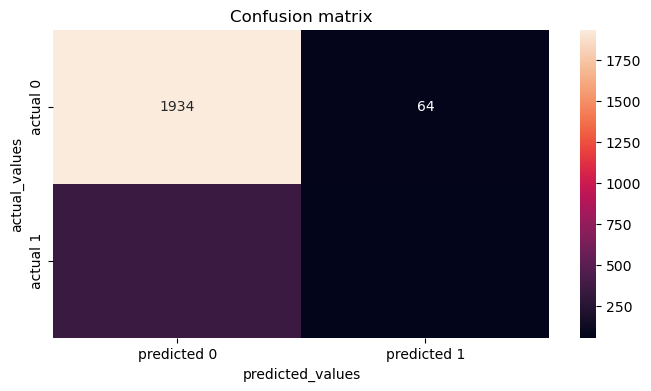

In [1065]:
plt.figure(figsize=(8,4))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(data = cm_lr, annot=True, fmt="d", xticklabels= ['predicted 0', 'predicted 1'], yticklabels=['actual 0', 'actual 1'],annot_kws={"size": 10})
plt.title("Confusion matrix")
plt.xlabel('predicted_values')
plt.ylabel('actual_values')


plt.show()

In [1066]:
cm_lr

array([[1934,   64],
       [ 346,   55]], dtype=int64)

In [1068]:
test_df

,actual,prediction
397,1,1
3107,0,0
9331,0,0
357,1,0
1326,1,1
...,...,...
9322,0,0
10440,0,0
3077,0,0
6113,0,0


## Manually calculating tp,tn,fp,fn

In [1069]:
tp = test_df[(test_df['actual'] ==1) & (test_df['prediction']==1)].shape[0]
tp

55

In [1070]:
tn = test_df[(test_df['actual']==0) & (test_df['prediction']==0)].shape[0]
tn

1934

In [1071]:
fp = test_df[(test_df['actual']==1) & (test_df['prediction']==0)].shape[0]
fp

346

In [1072]:
fn = test_df[(test_df['actual']==0) & (test_df['prediction']==1)].shape[0]
fn

64

In [1074]:
df3['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

## Random forest

In [1075]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
report = classification_report(y_test, y_pred_rf)

accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
print(f"accuracy score: {accuracy_score_rf}")
print("-----------------------")
print("classification report using Random forest classifier:")
print(report)

accuracy score: 0.9787411421425594
-----------------------
classification report using Random forest classifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [1076]:
test_df_rf = pd.DataFrame()
test_df_rf['actual'] = y_test
test_df_rf['prediction'] = y_pred_rf
test_df_rf

,actual,prediction
397,1,1
3107,0,0
9331,0,0
357,1,1
1326,1,1
...,...,...
9322,0,0
10440,0,0
3077,0,0
6113,0,0


In [1077]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[1987,   11],
       [  40,  361]], dtype=int64)

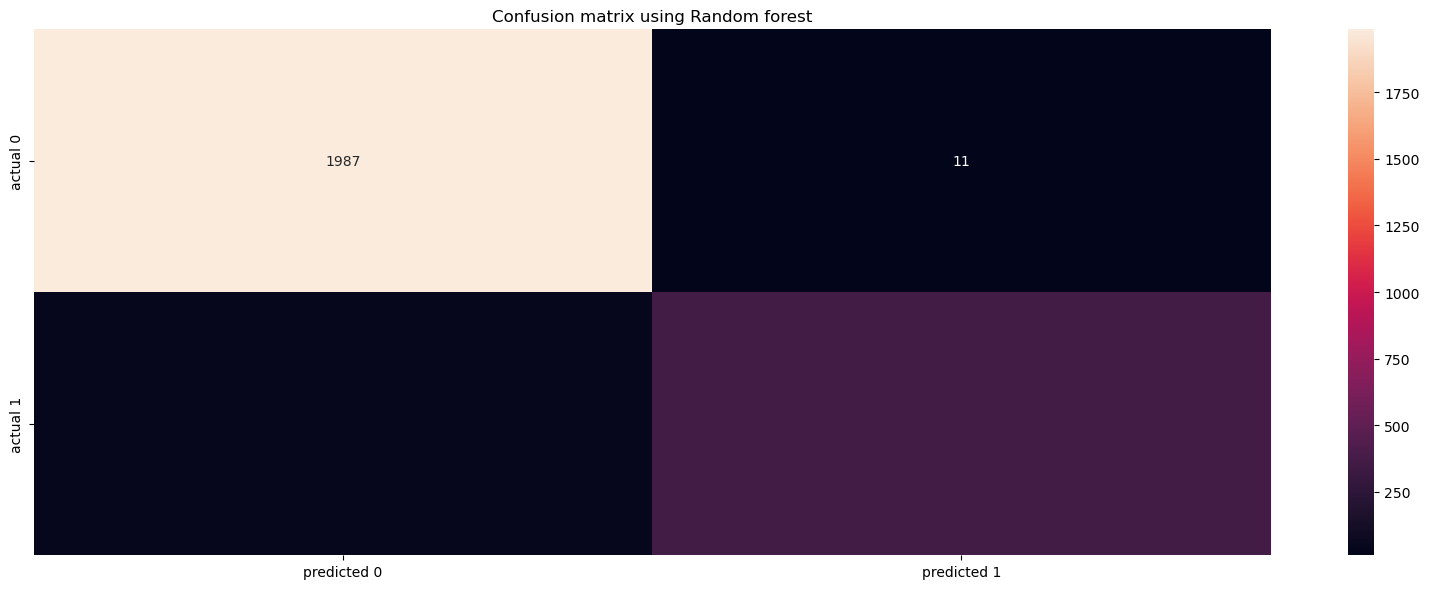

In [1078]:
plt.figure(figsize=(16,6))
sns.heatmap(data=cm_rf, annot=True,xticklabels=['predicted 0', 'predicted 1'], yticklabels=['actual 0', 'actual 1'], fmt='d')
plt.title("Confusion matrix using Random forest")

plt.tight_layout()
plt.show()

## XGB Classifier

In [1079]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
report = classification_report(y_test, y_pred_xgb)

accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"accuracy score: {accuracy_score_xgb}")
print("-----------------------")
print("classification report using XGB classifier:")
print(report)

accuracy score: 0.9783243017924135
-----------------------
classification report using XGB classifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [1080]:
test_df_xgb = pd.DataFrame()
test_df_xgb['actual'] = y_test
test_df_xgb['prediction'] = y_pred_xgb
test_df_xgb

,actual,prediction
397,1,1
3107,0,0
9331,0,0
357,1,1
1326,1,1
...,...,...
9322,0,0
10440,0,0
3077,0,0
6113,0,0


In [1081]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb

array([[1985,   13],
       [  39,  362]], dtype=int64)

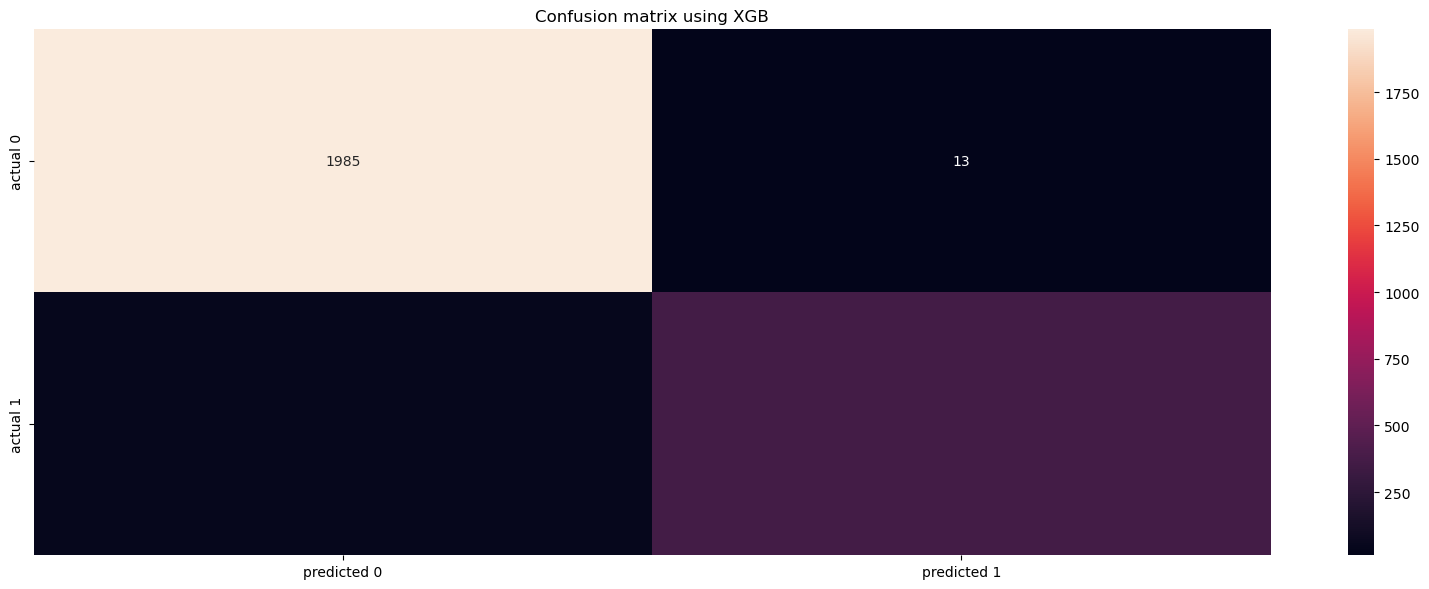

In [1082]:
plt.figure(figsize=(16,6))
sns.heatmap(data=cm_xgb, annot=True,xticklabels=['predicted 0', 'predicted 1'], yticklabels=['actual 0', 'actual 1'], fmt='d')
plt.title("Confusion matrix using XGB")

plt.tight_layout()
plt.show()

## Function 

In [1083]:
def model_training_and_evaluation(model, X_train, X_test, y_train , y_test):
    
    models = {
        'LogisticRegression': LogisticRegression(),
        'RandomForestClassifier': RandomForestClassifier(),
        'XGBClassifier': XGBClassifier()
    }

    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train) # model fit
    
        y_pred = model.predict(X_test) # model predict
        report = classification_report(y_test, y_pred) # saved results
        print('----------------------------------')

        results[name] = {
            'classification_report': print(f"{name}: \n {report}"),
    
        }

In [1084]:
model_training_and_evaluation(model, X_train, X_test, y_train , y_test)

----------------------------------
LogisticRegression: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1998
           1       0.46      0.14      0.21       401

    accuracy                           0.83      2399
   macro avg       0.66      0.55      0.56      2399
weighted avg       0.78      0.83      0.79      2399

----------------------------------
RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399

----------------------------------
XGBClassifier: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy

# Treating class imbalance

In [1085]:
y_train.value_counts()

left
0    8002
1    1590
Name: count, dtype: int64

observation:
- clear class imbalance with variables
- can be treated using oversampling or undersampling methods
- SMOTE (synthetic minority oversampling technique)
- majority class : 0
- minority class : 1

In [894]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [895]:
X_train_smote.shape, y_train_smote.shape, X_test.shape, y_test.shape

((16004, 17), (16004,), (2399, 17), (2399,))

In [896]:
from collections import Counter
print(Counter(y_train_smote))

Counter({0: 8002, 1: 8002})


In [900]:
print("Models performance after SMOTE/without class imbalance")

model_training_and_evaluation(models, X_train_smote, X_test, y_train_smote,  y_test)

Models performance after SMOTE/without class imbalance
----------------------------------
LogisticRegression: 
               precision    recall  f1-score   support

           0       0.97      0.76      0.86      1998
           1       0.43      0.88      0.58       401

    accuracy                           0.78      2399
   macro avg       0.70      0.82      0.72      2399
weighted avg       0.88      0.78      0.81      2399

----------------------------------
RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1998
           1       0.95      0.89      0.92       401

    accuracy                           0.97      2399
   macro avg       0.97      0.94      0.95      2399
weighted avg       0.97      0.97      0.97      2399

----------------------------------
XGBClassifier: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1

observation:
- best model is XGB classifier

In [1122]:
y_probs = model_xgb.predict_proba(X_test)[:,1]
y_probs

array([9.9992073e-01, 3.4408543e-02, 5.2455254e-03, ..., 3.3324130e-04,
       2.2599117e-03, 2.8052628e-03], dtype=float32)

In [1124]:
roc_auc = roc_auc_score(y_test,y_probs)
roc_auc

0.976935788656487

In [1126]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

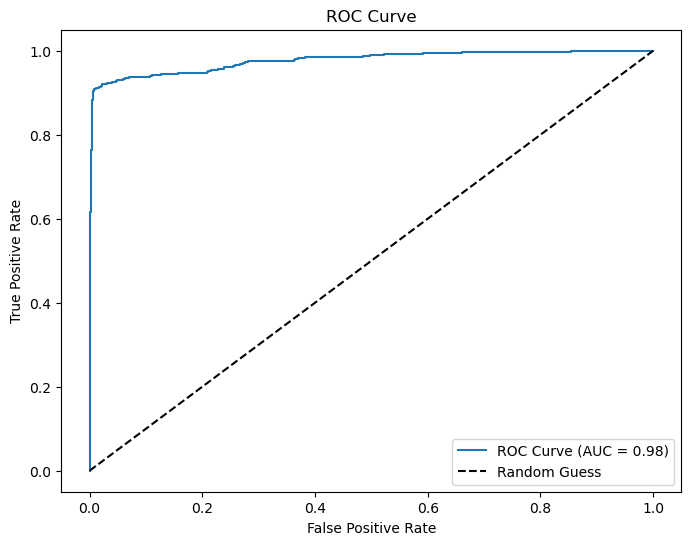

In [1128]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [1132]:
probabilites_df = pd.DataFrame()
probabilites_df['probabilites'] = model_xgb.predict_proba(X_test)[:,1].tolist()

probabilites_df.head()

,probabilites
0,0.999921
1,0.034409
2,0.005246
3,0.989872
4,0.995658


In [1133]:
merged_df = X_test.merge(probabilites_df,how='inner', on=X_test.index)
merged_df['probabilites'] = merged_df['probabilites'] * 100

merged_df['score'] = merged_df['probabilites'].apply(lambda x: ('red' if x > 90 else 
                                                                    ('orange' if x > 60 and x < 90 else 
                                                                        ('yellow' if x > 20 and x < 60 else 'green')
                                                               )))

merged_df

,key_0,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,cluster,probabilites,score
0,397,0.09,0.8,0.920561,0.375,0,0,1,0,0,0,0,0,0,1,0,0,1,99.992073,red
1,3107,0.74,0.4,0.271028,0.250,0,0,2,0,0,0,0,0,0,0,1,0,0,3.440854,green
2,9331,0.81,0.4,0.542056,0.000,0,0,1,0,0,0,0,0,0,1,0,0,0,0.524553,green
3,357,0.37,0.0,0.247664,0.125,0,0,1,0,0,0,0,0,0,0,1,0,1,98.987204,red
4,1326,0.10,0.8,0.822430,0.250,0,0,1,0,1,0,0,0,0,0,0,0,1,99.565840,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,9322,0.70,0.2,0.542056,0.125,0,0,1,0,0,0,0,0,0,1,0,0,0,0.265136,green
2395,10440,0.87,0.6,0.070093,0.250,0,0,3,0,0,0,1,0,0,0,0,0,2,0.006299,green
2396,3077,0.81,0.2,0.397196,0.000,1,0,2,0,0,0,0,0,0,1,0,0,2,0.033324,green
2397,6113,0.70,0.4,0.233645,0.125,0,0,1,0,0,0,0,1,0,0,0,0,0,0.225991,green


observation:
- left : 0 indicates emp's stay in company
- left : 1 indicates emp's how left the company

- In this problem, we keep recall as priority , since we  want to capture emp's leaving the company

- recall : 0 indicates model can capture emp group who stay's in company with 99% accuracy
- recall : 1 indicates model can capture emp group who leaves the company with 90% accuracy


# Test dataset analysis using predicted_proba

In [1134]:
merged_df['score'].unique()

array(['red', 'green', 'orange', 'yellow'], dtype=object)

In [1138]:
merged_df['score'].value_counts(normalize=True)

score
green     0.837849
red       0.147561
orange    0.007920
yellow    0.006669
Name: proportion, dtype: float64

In [1176]:
results_df = pd.DataFrame()

results_df['score'] = merged_df['score'].value_counts(normalize=True)
results_df['score'] = round(results_df['score'] * 100,2) 


# results_df['zone'] = results_df['score'].apply(lambda x: x.map(zone_mapping))

# results_df = results_df.reset_index()
# results_df.rename(columns={'index': 'score_category'}, inplace=True)
results_df


,score
score,
green,83.78
red,14.76
orange,0.79
yellow,0.67


observations:
- from test dataset ~14% of emp are in red-zone indicates high-risk
- from test dataset ~84% of emp are in safe-zone indicates low-risk

- high-risk profiles/emp needs to be reviewed properly & implement retention strategies like career development programms, work-life balance polices etc 